The financial time series that I am using in this question is Bitcoin(BTC). It is the most important cryptocurrency till date not only because it was the first crypto to be invented but also because of its turing completeness. It is ahead of any other currencies with respect to its network effect and strong security stature. Another big advantage of choosing it over other cryptocurrencies is that, it has proved to be a good store of value over the period of years.
Bitcoin prices can be impacted by the prices of other cryptocurrencies like Etherium, Bitcoin SV, Bitcoin Cash, XRP etc. The Bitcoin price also depends on some other events that may not be quantifiable as compared to the crypto prices. Supply and Demand of money, Mining difficulty,Government policy change over the years had tremendous short-term impact on the price of Bitcoin. Also events like changes in global oil prices,gold price, trade war between America and China  will impact the price of Bitcoin. Also international data security breach in the form of hacking can impact the price of Bitcoin.
Of all these I believe the prices of the cryptocurrencies, oil price change can be obtained easily. Events like government policy change, trade war, minimg difficulty and hacking event varibles cannot be obtained to measure its impact on the price of Bitcoin.

# The Analysis

In [ ]:
# Using ElasticNet to regularise a larger model into a smaller one to see the variables that are actually impacting the price of Bitcoin.
# Using Simple Linear regression model to forecast the Bitcoin time series.
# Graphical representation to show Actual vs Fitted Estimation of BTC prices.
# Evaluating MSE for both ElasticNet and Linear Regression and see which one is better and how the forecasting model can be improved.

In [1]:
import requests
import json
import pandas as pd
import datetime

In [2]:
lim = '100'
pair = ['BTC','BSV','ETH','XRP','USDT','BCH','LTC','XLM','XTZ','EOS','DOGE']
coins = pd.DataFrame()

In [3]:
my_crypto_key = "aa0888efdbbb911e79e296c6f674d5fc440217860b85af736b9df6853bab8746"

In [4]:
for i in pair:
    URL_A = 'https://min-api.cryptocompare.com/data/histoday?fsym='+i+'&tsym=USD&limit='+lim+ '&api_key='
    URL = URL_A + my_crypto_key
    data = requests.get(URL)
    json_data = data.json()
    table = pd.json_normalize(json_data, 'Data').set_index('time')
    table.index = pd.to_datetime(table.index ,unit='s')
    coins = pd.concat([coins, table.high], axis=1)
coins.columns = pair

In [5]:
coins.columns = pair
coins = coins[pair]
coins

,BTC,BSV,ETH,XRP,USDT,BCH,LTC,XLM,XTZ,EOS,DOGE
2021-04-20,57101.05,318.64,2348.17,1.4470,1.012,973.09,274.67,0.5310,5.713,6.854,0.4233
2021-04-21,56801.94,306.25,2469.05,1.4640,1.056,999.13,276.83,0.5382,5.834,6.848,0.3474
2021-04-22,55458.61,292.72,2644.50,1.4180,1.073,971.08,289.68,0.5142,5.757,6.817,0.3091
2021-04-23,52112.75,288.85,2441.96,1.1960,1.019,873.36,256.89,0.4576,5.069,5.991,0.2691
2021-04-24,51223.86,245.77,2370.67,1.1720,1.024,840.94,241.73,0.4616,4.828,5.595,0.2901
...,...,...,...,...,...,...,...,...,...,...,...
2021-07-25,35382.63,131.79,2197.07,0.6120,1.000,473.96,128.05,0.2675,2.906,3.697,0.2005
2021-07-26,40553.85,135.77,2430.27,0.6780,1.089,517.81,140.36,0.2845,3.116,3.998,0.2329
2021-07-27,39535.50,139.34,2319.63,0.6527,1.002,503.89,135.14,0.2702,2.930,3.788,0.2094
2021-07-28,40906.09,136.70,2346.53,0.7526,1.022,519.04,141.96,0.2815,2.899,4.014,0.2136


In [6]:
coins_lagged=coins.copy()
trailing_window_size = 1
for window in range(1, trailing_window_size +1):
    shifted = coins.shift(window)
    shifted.columns = [x + "_lag" + str(window) for x in coins.columns]
    
    coins_lagged = pd.concat((coins_lagged, shifted), axis=1)
coins_lagged = coins_lagged.dropna()

In [7]:
coins_lagged

,BTC,BSV,ETH,XRP,USDT,BCH,LTC,XLM,XTZ,EOS,...,BSV_lag1,ETH_lag1,XRP_lag1,USDT_lag1,BCH_lag1,LTC_lag1,XLM_lag1,XTZ_lag1,EOS_lag1,DOGE_lag1
2021-04-21,56801.94,306.25,2469.05,1.4640,1.056,999.13,276.83,0.5382,5.834,6.848,...,318.64,2348.17,1.4470,1.012,973.09,274.67,0.5310,5.713,6.854,0.4233
2021-04-22,55458.61,292.72,2644.50,1.4180,1.073,971.08,289.68,0.5142,5.757,6.817,...,306.25,2469.05,1.4640,1.056,999.13,276.83,0.5382,5.834,6.848,0.3474
2021-04-23,52112.75,288.85,2441.96,1.1960,1.019,873.36,256.89,0.4576,5.069,5.991,...,292.72,2644.50,1.4180,1.073,971.08,289.68,0.5142,5.757,6.817,0.3091
2021-04-24,51223.86,245.77,2370.67,1.1720,1.024,840.94,241.73,0.4616,4.828,5.595,...,288.85,2441.96,1.1960,1.019,873.36,256.89,0.4576,5.069,5.991,0.2691
2021-04-25,50576.40,247.77,2357.02,1.1570,1.031,806.63,235.74,0.4448,4.795,5.460,...,245.77,2370.67,1.1720,1.024,840.94,241.73,0.4616,4.828,5.595,0.2901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-25,35382.63,131.79,2197.07,0.6120,1.000,473.96,128.05,0.2675,2.906,3.697,...,130.58,2199.99,0.6207,1.007,468.30,127.72,0.2724,2.821,3.741,0.2043
2021-07-26,40553.85,135.77,2430.27,0.6780,1.089,517.81,140.36,0.2845,3.116,3.998,...,131.79,2197.07,0.6120,1.000,473.96,128.05,0.2675,2.906,3.697,0.2005
2021-07-27,39535.50,139.34,2319.63,0.6527,1.002,503.89,135.14,0.2702,2.930,3.788,...,135.77,2430.27,0.6780,1.089,517.81,140.36,0.2845,3.116,3.998,0.2329
2021-07-28,40906.09,136.70,2346.53,0.7526,1.022,519.04,141.96,0.2815,2.899,4.014,...,139.34,2319.63,0.6527,1.002,503.89,135.14,0.2702,2.930,3.788,0.2094


In [8]:
coins_lagged.to_csv('cryto_prices_data.csv', index_label='time')

In [9]:
df = pd.read_csv('cryto_prices_data.csv', index_col='time')

In [10]:
df.index = pd.to_datetime(df.index)
df.index = df.index.normalize()

In [11]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [12]:
sc_x = StandardScaler()
df_scaled = pd.DataFrame(sc_x.fit_transform(df), index=df.index, columns=df.columns)

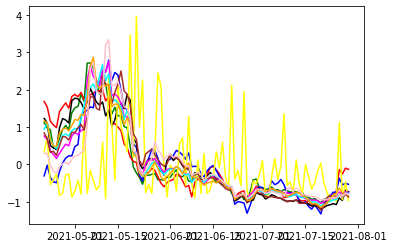

In [13]:
plt.plot(df_scaled.index, df_scaled['BSV'], color='green')
plt.plot(df_scaled.index, df_scaled['BTC'], color='red')
plt.plot(df_scaled.index, df_scaled['ETH'], color='blue')
plt.plot(df_scaled.index, df_scaled['XRP'], color='black')
plt.plot(df_scaled.index, df_scaled['USDT'], color='yellow')
plt.plot(df_scaled.index, df_scaled['BCH'], color='magenta')
plt.plot(df_scaled.index, df_scaled['LTC'], color='cyan')
plt.plot(df_scaled.index, df_scaled['XLM'], color='brown')
plt.plot(df_scaled.index, df_scaled['XTZ'], color='orange')
plt.plot(df_scaled.index, df_scaled['EOS'], color='pink')

In [18]:
split = int(int(lim)/2)

In [19]:
Ytrain = pd.DataFrame(df_scaled[:split]['BTC'])
Ytest = pd.DataFrame(df_scaled[split:]['BTC'])

In [20]:
X = df_scaled[['BTC_lag1', 'BSV_lag1', 'ETH_lag1', 'XRP_lag1', 'USDT_lag1', 'BCH_lag1', 'LTC_lag1', 'XLM_lag1', 'XTZ_lag1', 'EOS_lag1','DOGE_lag1']]

In [21]:
from sklearn.linear_model import ElasticNet

In [22]:
en = ElasticNet(alpha=0.1, normalize=False)

In [23]:
t=en.fit(X[:split], Ytrain)
t

ElasticNet(alpha=0.1)

In [25]:
coef = list(en.coef_)
coef

[0.7294321133762405,
 0.15979565282867667,
 -0.0,
 0.0,
 -0.07330637258764833,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0]

In [26]:
count = 0
for i in X.columns:
    print(i, ':', coef[count])
    count = count + 1

BTC_lag1 : 0.7294321133762405
BSV_lag1 : 0.15979565282867667
ETH_lag1 : -0.0
XRP_lag1 : 0.0
USDT_lag1 : -0.07330637258764833
BCH_lag1 : 0.0
LTC_lag1 : 0.0
XLM_lag1 : -0.0
XTZ_lag1 : 0.0
EOS_lag1 : -0.0
DOGE_lag1 : -0.0


In [ ]:
# From the above values of the coefficients it is clear that the application of ElasticNet has reduced a model with multiple variables into a smaller model with only two impacting variables.Here only USDT and BSV have non-zero beta values which confirms that they are only variables in our list that impact the price of Bitcoin.

In [27]:
t.predict(X[:split])

array([ 1.55429423,  1.43123078,  1.2688322 ,  1.08577003,  0.92786801,
        0.86698708,  1.25373116,  1.37658389,  1.43577341,  1.31556721,
        1.655998  ,  1.70688041,  1.64596556,  1.80870071,  1.49386441,
        1.85691422,  1.84882176,  1.87032654,  1.90002544,  1.81717859,
        1.79975343,  1.69980812,  1.45568081,  0.97271699,  1.12747138,
        0.8316428 ,  0.84765844,  0.56644983,  0.52113366,  0.02721702,
        0.09863941, -0.22544927, -0.30235214, -0.46680151, -0.07523697,
       -0.09909731,  0.00432715, -0.10803112, -0.4148589 , -0.51624565,
       -0.4241163 , -0.27053518, -0.30176764, -0.248378  , -0.09286295,
       -0.22836973, -0.35269409, -0.36701156, -0.50408013, -0.59531341])

In [32]:
BTC_Fitted = X.dot(coef)
BTC_Fitted

time
2021-04-21    1.472638
2021-04-22    1.349575
2021-04-23    1.187176
2021-04-24    1.004114
2021-04-25    0.846212
                ...   
2021-07-25   -0.680004
2021-07-26   -0.595960
2021-07-27   -0.326274
2021-07-28   -0.250539
2021-07-29   -0.179449
Freq: D, Length: 100, dtype: float64

In [33]:
BTC_actual = df_scaled[['BTC']]
BTC_actual

,BTC
time,
2021-04-21,1.684803
2021-04-22,1.533954
2021-04-23,1.158231
2021-04-24,1.058413
2021-04-25,0.985707
...,...
2021-07-25,-0.720476
2021-07-26,-0.139774
2021-07-27,-0.254130


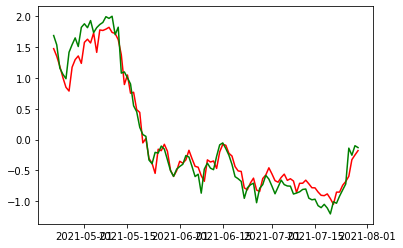

In [35]:
plt.plot(df_scaled.index, BTC_Fitted, color='red')
plt.plot(df_scaled.index, BTC_actual, color='green')

In [ ]:
# Graphical representation to show Actual vs Fitted values of BTC.

In [56]:
y = BTC_actual
X = BTC_Fitted

In [57]:
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)

In [58]:
sample_size = len(df_scaled)

In [59]:
squaredresidual = np.square(X-y)

In [60]:
import numpy as np

In [61]:
sum_squaredresidual = np.sum(squaredresidual)
sum_squaredresidual

3.5382963425849296

In [62]:
MSE = sum_squaredresidual/sample_size
MSE

0.0353829634258493

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [64]:
X = df_scaled[['BSV_lag1']]

In [65]:
y = df_scaled['BTC']

In [66]:
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(X,y)
print(lr.intercept_, lr.coef_)

[3.2308996e-16] [[0.93905005]]


In [69]:
forecast_BTC = lr.predict(X)

In [70]:
squared_residuals = np.square(forecast_BTC-y)

In [71]:
MSE = (np.sum(squared_residuals))/len(y)
MSE

0.11818500147813042

In [ ]:
# MSE for ElasticNet is 0.0353829634258493. Where as MSE for Linear Regression is 0.11818500147813042. Smaller the value of the MSE, better will be estimated model. in this case Elastic Net has smaller MSE and so it is a better choice than simple linear regression model.
# We can improve the ElasticNet model ie. reduce the value of the MSE if we take a much bigger sample size of the variables. I have taken here 100 values. The more we increase the sample size the better will be the fit. Also the cryptocurrency variables that we have randomly taken can impact the estimated model. If our model has more variables that impact the price of BTC the ElasticNet MSE value will also improve, ie. will decrease.
